# Predict the Next Character in a Word (Text Sequence Modeling) Story

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [10]:
# Load and clean text
with open("cleaned_merged_fairy_tales_without_eos.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

# Filter characters (optional: keep only letters and punctuation)
text = ''.join(c for c in text if c.isprintable())

In [11]:
# Create character mappings
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}
vocab_size = len(chars)

In [12]:
# Create sequences
seq_length = 40
step = 3
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

In [13]:
# Limit dataset size for memory efficiency
max_samples = 100000
sequences = sequences[:max_samples]
next_chars = next_chars[:max_samples]

In [14]:
# Integer encode sequences
X = np.zeros((len(sequences), seq_length), dtype=np.int32)
y = np.zeros(len(sequences), dtype=np.int32)

for i, seq in enumerate(sequences):
    X[i] = [char_to_idx[c] for c in seq]
    y[i] = char_to_idx[next_chars[i]]

### LSTM model

In [15]:
# Build model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=seq_length),
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train model
history = model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.3087 - loss: 2.4703
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.3783 - loss: 2.1204
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4156 - loss: 1.9976
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.4400 - loss: 1.9130
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4579 - loss: 1.8504
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.4694 - loss: 1.8001
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4820 - loss: 1.7587
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.4907 - loss: 1.7234
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4982 - loss: 1.6932
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5051 - loss: 1.6665


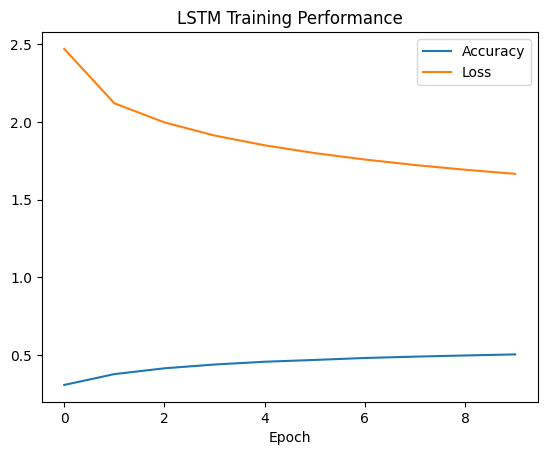

In [17]:
# Plot training curves
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title("LSTM Training Performance")
plt.xlabel("Epoch")
plt.legend()
plt.show()

### RNN model

In [18]:
# Generate text
def sample_prediction(model, seed_text, length=100):
    generated = seed_text
    for _ in range(length):
        x_pred = np.array([[char_to_idx[c] for c in seed_text]])
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = idx_to_char[next_index]
        generated += next_char
        seed_text = seed_text[1:] + next_char
    return generated

seed = text[:seq_length]
print("Generated Text:\n", sample_prediction(model, seed))

Generated Text:
 the happy prince.high above the city, on the stor the stor the stor the stor the stor the stor the stor the stor the stor the stor the stor 


In [19]:
from tensorflow.keras.layers import SimpleRNN

# Build RNN model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=seq_length),
    SimpleRNN(128),
    Dense(vocab_size, activation='softmax')
])

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
rnn_history = rnn_model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.3233 - loss: 2.4205
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4160 - loss: 2.0133
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4518 - loss: 1.8783
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4751 - loss: 1.7897
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4922 - loss: 1.7260
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5043 - loss: 1.6791
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5144 - loss: 1.6398
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5220 - loss: 1.6082
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5286 - loss: 1.5821
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5333 - loss: 1.5594


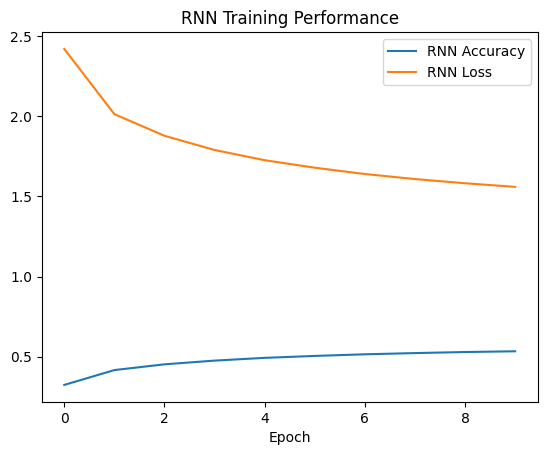

In [21]:
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy')
plt.plot(rnn_history.history['loss'], label='RNN Loss')
plt.title("RNN Training Performance")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [22]:
def sample_rnn_prediction(model, seed_text, length=100):
    generated = seed_text
    for _ in range(length):
        x_pred = np.array([[char_to_idx[c] for c in seed_text]])
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = idx_to_char[next_index]
        generated += next_char
        seed_text = seed_text[1:] + next_char
    return generated

print("RNN Generated Text:\n", sample_rnn_prediction(rnn_model, seed))

RNN Generated Text:
 the happy prince.high above the city, on the street the street the street the street the street the street the street the street the street 
